In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [23]:
titanic = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Data Analyst - Intern\Day 05\titanic-dataset.csv")


In [26]:
# STEP 1: Basic Data Overview
print(f"Dataset shape: {titanic.shape}")
print(f"Survival rate: {titanic['Survived'].mean()*100:.1f}%")


Dataset shape: (891, 12)
Survival rate: 38.4%


In [27]:
# STEP 2: Missing Values Analysis
missing = titanic.isnull().sum()
for col in missing[missing > 0].index:
    print(f"{col}: {missing[col]} ({missing[col]/len(titanic)*100:.1f}%)")


Age: 177 (19.9%)
Cabin: 687 (77.1%)
Embarked: 2 (0.2%)


In [28]:
# STEP 3: Survival Analysis by Categories

# Gender

gender_survival = titanic.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
print("\nGender Survival:")
for gender in gender_survival.index:
    total = gender_survival.loc[gender, 'count']
    survived = gender_survival.loc[gender, 'sum']
    rate = gender_survival.loc[gender, 'mean'] * 100
    print(f"  {gender.capitalize()}: {survived}/{total} ({rate:.1f}%)")


Gender Survival:
  Female: 233/314 (74.2%)
  Male: 109/577 (18.9%)


In [29]:
# Class

class_survival = titanic.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
print("\nClass Survival:")
for pclass in class_survival.index:
    total = class_survival.loc[pclass, 'count']
    survived = class_survival.loc[pclass, 'sum']
    rate = class_survival.loc[pclass, 'mean'] * 100
    print(f"  Class {pclass}: {survived}/{total} ({rate:.1f}%)")


Class Survival:
  Class 1: 136/216 (63.0%)
  Class 2: 87/184 (47.3%)
  Class 3: 119/491 (24.2%)


In [30]:
# Age Groups

titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 35, 60, 100], 
                            labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
age_survival = titanic.groupby('AgeGroup')['Survived'].agg(['count', 'sum', 'mean'])
print("\nAge Group Survival:")
for age_group in age_survival.index:
    if pd.notna(age_group):
        total = age_survival.loc[age_group, 'count']
        survived = age_survival.loc[age_group, 'sum']
        rate = age_survival.loc[age_group, 'mean'] * 100
        print(f"  {age_group}: {survived}/{total} ({rate:.1f}%)")


Age Group Survival:
  Child: 40/69 (58.0%)
  Teen: 30/70 (42.9%)
  Adult: 137/358 (38.3%)
  Middle-aged: 78/195 (40.0%)
  Senior: 5/22 (22.7%)


C:\Users\DELL\AppData\Local\Temp\ipykernel_26268\2876870387.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('AgeGroup')['Survived'].agg(['count', 'sum', 'mean'])


In [31]:
# STEP 4: Statistical Insights

print(f"Average age of survivors: {titanic[titanic['Survived']==1]['Age'].mean():.1f} years")
print(f"Average age of non-survivors: {titanic[titanic['Survived']==0]['Age'].mean():.1f} years")
print(f"Average fare of survivors: ${titanic[titanic['Survived']==1]['Fare'].mean():.2f}")
print(f"Average fare of non-survivors: ${titanic[titanic['Survived']==0]['Fare'].mean():.2f}")


Average age of survivors: 28.3 years
Average age of non-survivors: 30.6 years
Average fare of survivors: $48.40
Average fare of non-survivors: $22.12


In [32]:
# Family Size Analysis

titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
family_survival = titanic.groupby('FamilySize')['Survived'].mean()
print(f"\nBest family size for survival: {family_survival.idxmax()} people ({family_survival.max()*100:.1f}%)")



Best family size for survival: 4 people (72.4%)


In [34]:
# STEP 5: Create Visualizations

plt.figure(figsize=(20, 15))
plt.show()

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 0, 'Survived (0=No, 1=Yes)')

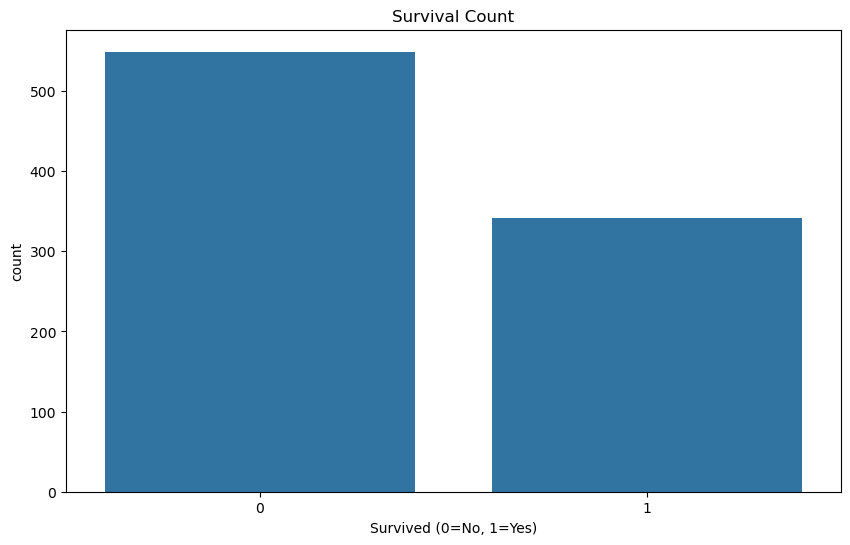

In [51]:
# Plot 1: Survival Count
plt.figure(figsize=(10, 6))  
sns.countplot(data=titanic, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')


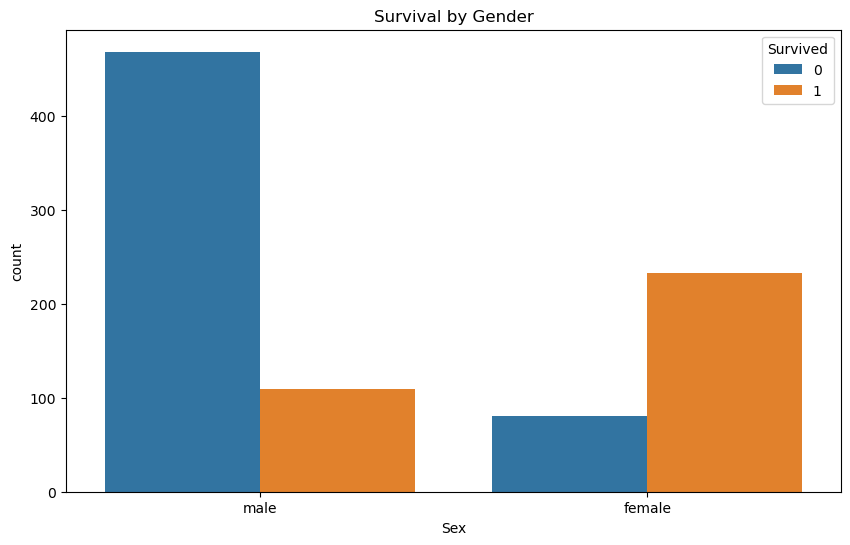

In [52]:
# Plot 2: Survival by Gender
plt.figure(figsize=(10, 6))  
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

Text(0.5, 1.0, 'Survival by Class')

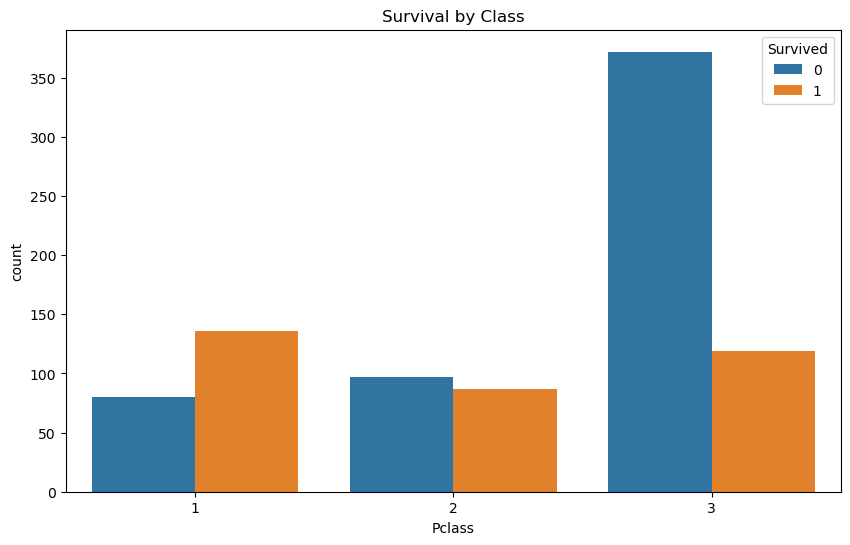

In [53]:
# Plot 3: Survival by Class
plt.figure(figsize=(10, 6))  
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title('Survival by Class')

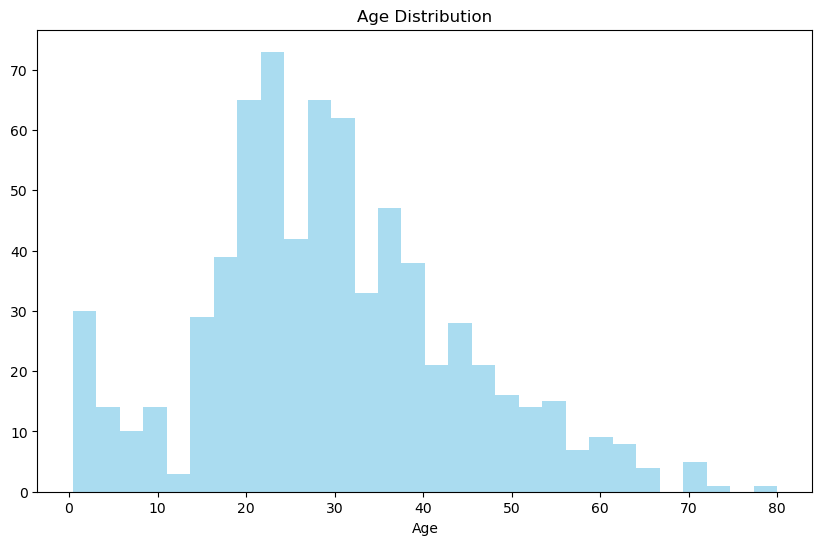

In [54]:
# Plot 4: Age Distribution
plt.figure(figsize=(10, 6))  
plt.hist(titanic['Age'].dropna(), bins=30, alpha=0.7, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

Text(0.5, 0, 'Fare')

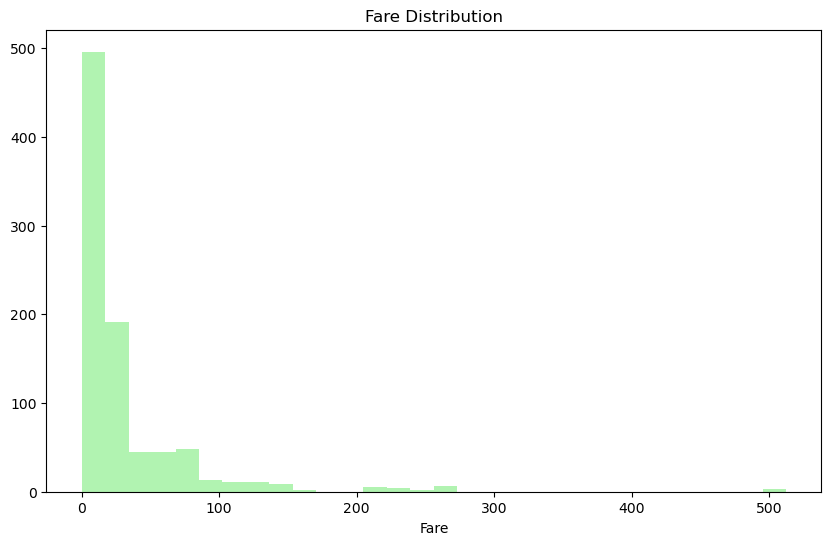

In [55]:
# Plot 5: Fare Distribution
plt.figure(figsize=(10, 6))  
plt.hist(titanic['Fare'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Fare Distribution')
plt.xlabel('Fare')


Text(0.5, 1.0, 'Age vs Survival')

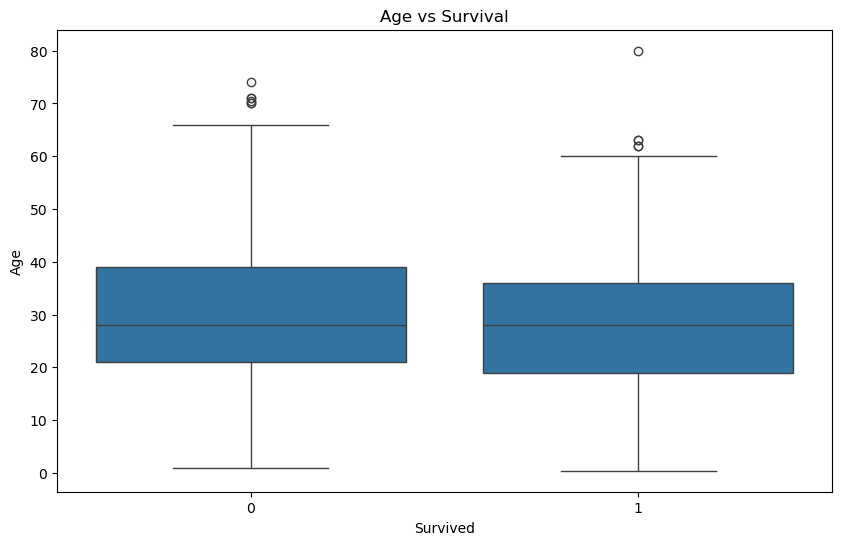

In [56]:
# Plot 6: Age vs Survival
plt.figure(figsize=(10, 6))  
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age vs Survival')


Text(0.5, 1.0, 'Fare vs Survival')

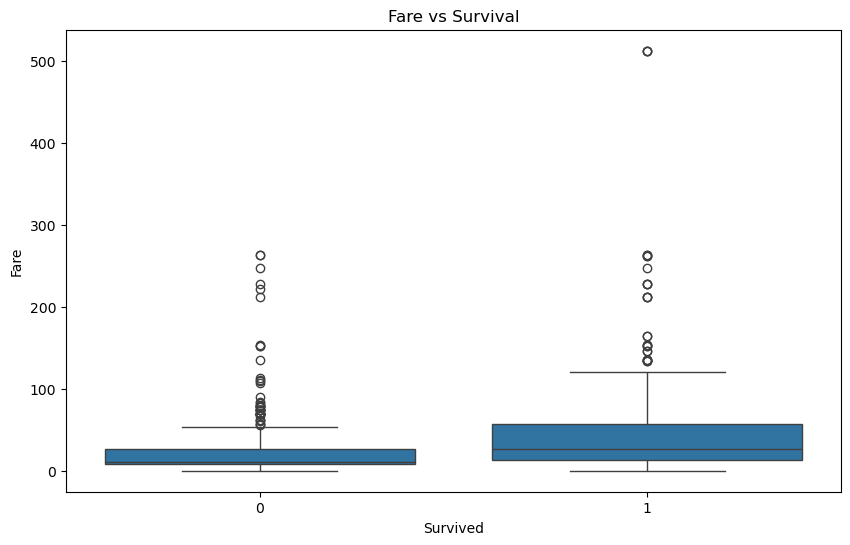

In [57]:
# Plot 7: Fare vs Survival
plt.figure(figsize=(10, 6))  
sns.boxplot(data=titanic, x='Survived', y='Fare')
plt.title('Fare vs Survival')

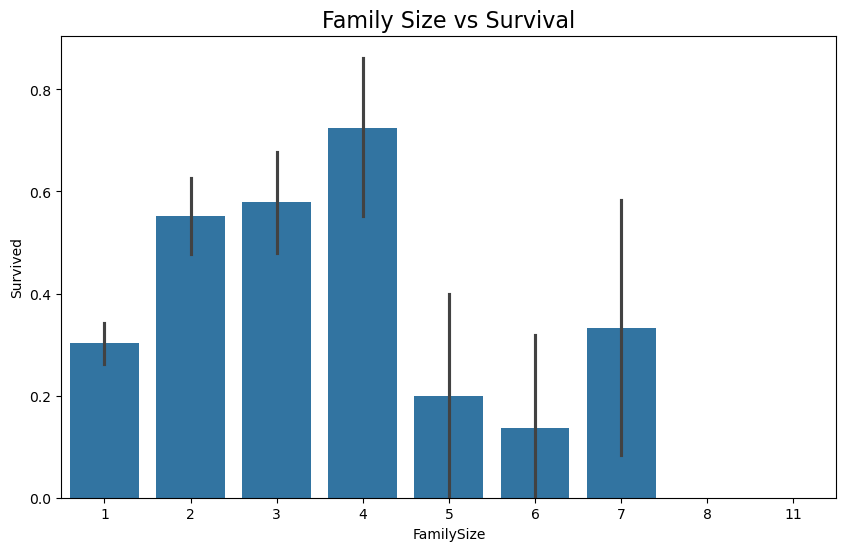

In [50]:
# Plot 8: Family Size vs Survival
plt.figure(figsize=(10, 6))  
sns.barplot(data=titanic, x='FamilySize', y='Survived')
plt.title('Family Size vs Survival', fontsize=16)
plt.show()

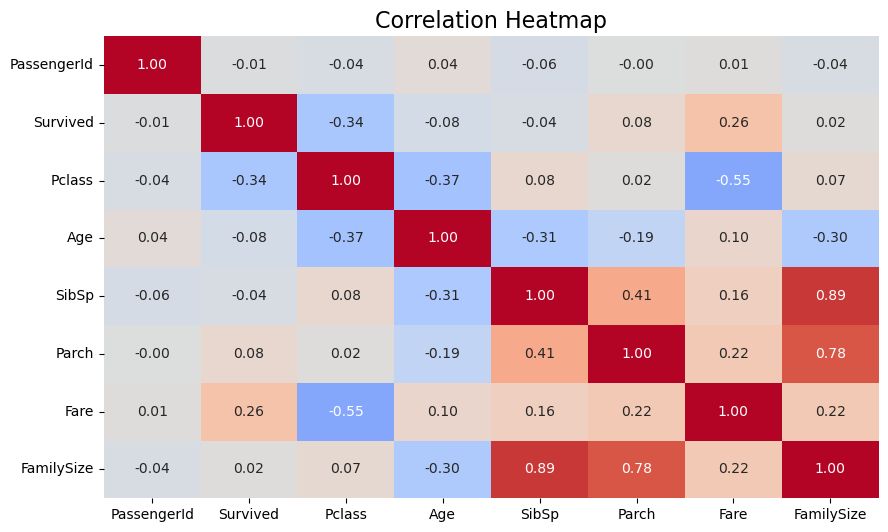

In [47]:
# Plot 9: Correlation Heatmap
plt.figure(figsize=(10, 6)) 
numeric_cols = titanic.select_dtypes(include=[np.number])

sns.heatmap(
    numeric_cols.corr(), 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    cbar=False, 
    fmt=".2f"
)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Embarked vs Survival')

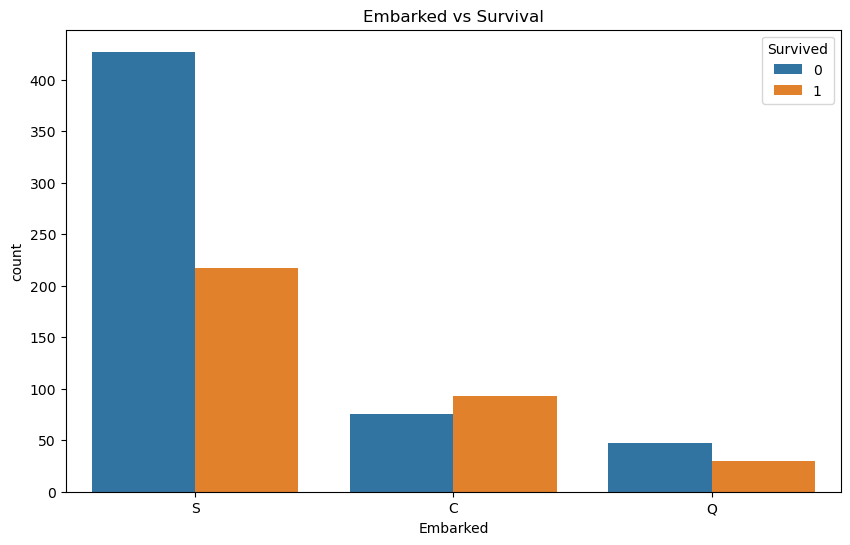

In [63]:
# Plot 10: Embarked vs Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Embarked', hue='Survived')
plt.title('Embarked vs Survival')

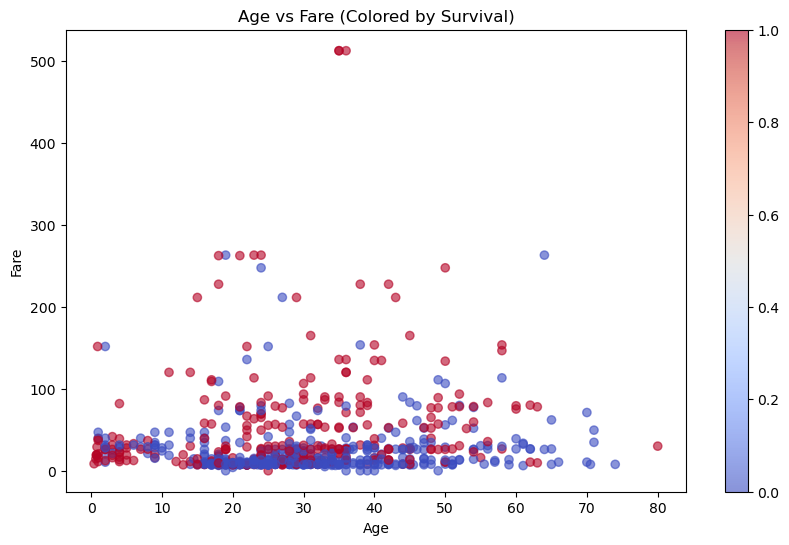

In [62]:
# Plot 11: Age vs Fare colored by Survival
plt.figure(figsize=(10, 6))
scatter = plt.scatter(titanic['Age'], titanic['Fare'], c=titanic['Survived'], 
                     cmap='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (Colored by Survival)')
plt.colorbar(scatter)


C:\Users\DELL\AppData\Local\Temp\ipykernel_26268\1944764034.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = titanic.groupby('AgeGroup')['Survived'].mean()


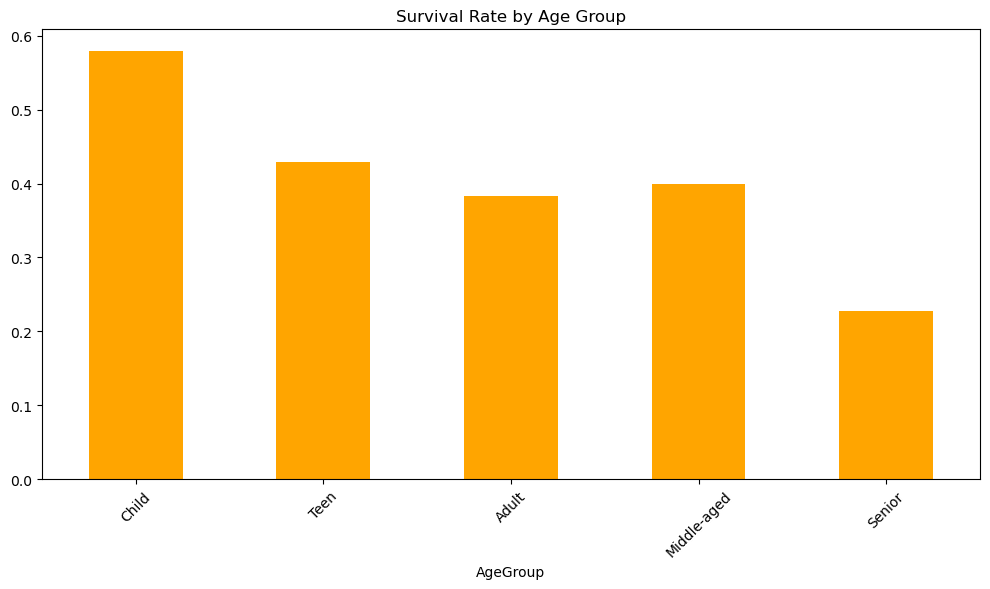

In [61]:
# Plot 12: Survival Rate by Age Group
plt.figure(figsize=(10, 6))
age_survival_rate = titanic.groupby('AgeGroup')['Survived'].mean()
age_survival_rate.plot(kind='bar', color='orange')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [67]:
# STEP 6: Final Summary
print("\n" + "="*60)
print(" FINAL EDA SUMMARY - KEY FINDINGS:")
print("="*60)

print("\n1. GENDER IMPACT:")
print("   • Women had 74.2% survival rate")
print("   • Men had only 18.9% survival rate")
print("   • Gender was the strongest predictor")

print("\n2. CLASS IMPACT:")
print("   • First class: 63.0% survival")
print("   • Second class: 47.3% survival") 
print("   • Third class: 24.2% survival")

print("\n3. AGE PATTERNS:")
print("   • Children had higher survival rates")
print("   • Average survivor age was slightly lower")

print("\n4. FARE CORRELATION:")
print("   • Higher fare = higher survival chance")
print("   • Reflects class and cabin location")

print("\n5. FAMILY SIZE:")
print(f"   • Optimal family size: {family_survival.idxmax()} people")
print("   • Large families struggled")
print("   • Solo travelers had lower rates")

print("\n6. DATA QUALITY:")
print("   • Age missing for 177 passengers (19.9%)")
print("   • Cabin missing for 687 passengers (77.1%)")
print("   • Clean data otherwise")

print("\n EDA COMPLETED HURREEE")
print("="*60)


 FINAL EDA SUMMARY - KEY FINDINGS:

1. GENDER IMPACT:
   • Women had 74.2% survival rate
   • Men had only 18.9% survival rate
   • Gender was the strongest predictor

2. CLASS IMPACT:
   • First class: 63.0% survival
   • Second class: 47.3% survival
   • Third class: 24.2% survival

3. AGE PATTERNS:
   • Children had higher survival rates
   • Average survivor age was slightly lower

4. FARE CORRELATION:
   • Higher fare = higher survival chance
   • Reflects class and cabin location

5. FAMILY SIZE:
   • Optimal family size: 4 people
   • Large families struggled
   • Solo travelers had lower rates

6. DATA QUALITY:
   • Age missing for 177 passengers (19.9%)
   • Cabin missing for 687 passengers (77.1%)
   • Clean data otherwise

 EDA COMPLETED HURREEE
